In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 25)

### **Latar Belakang**

TransJakarta sebagai sistem _Bus Rapid Transit_ (BRT) pertama di Indonesia diluncurkan pada tahun 2004 dengan tujuan menyediakan transportasi massal yang efisien, terjangkau, dan ramah lingkungan. Sistem ini dirancang untuk mengurangi ketergantungan masyarakat pada kendaraan pribadi dan meningkatkan mobilitas perkotaan.

Namun, TransJakarta menghadapi berbagai tantangan operasional yang mempengaruhi kualitas layanan. Masalah-masalah seperti: `durasi perjalanan`, `kepadatan penumpang pada jam sibuk`, `kondisi infrastruktur yang memerlukan pemeliharaan`, serta `integrasi dengan moda transportasi lain` masih menjadi perhatian utama. Kondisi ini berpengaruh terhadap kepuasan pengguna dan efektivitas sistem transportasi publik secara keseluruhan.

### **Pernyataan Masalah**

Transjakarta ingin mengetahui pola perjalanan penumpang untuk meningkatkan efisiensi operasional, khususnya dalam hal pengalokasian armada dan penjadwalan rute. Informasi ini akan membantu Transjakarta untuk `mengoptimalkan penggunaan armada`, `memperbaiki rute yang ada`, dan `mempersingkat durasi perjalanan penumpang`. Dengan menganalisis data perjalanan, perusahaan dapat merancang strategi yang lebih baik dalam merespon kebutuhan pengguna.

Sebagai seorang _data analyst_, kita akan mencoba menjawab pertanyaan berikut:

Bagaimana cara mengalokasikan armada secara lebih efisien berdasarkan pola perjalanan penumpang bus Transjakarta?

### **Data Understanding**

##### **Dataset Dictionary**

Dataset ini berisi informasi terkait penumpang BRT *(Bus Rapid Transit)* TransJakarta.

Ada 22 kolom di dalam dataset Transjakarta, yaitu:
- `transID`         : ID transaksi unik untuk setiap transaksi.

- `payCardID`       : ID pelanggan yang tertera di kartu pembayaran.

- `payCardBank`     : Nama bank penerbit kartu pelanggan.

- `payCardName`     : Nama pelanggan yang tercatat di kartu.

- `payCardSex`      : Jenis kelamin pelanggan yang tercatat di kartu.

- `payCardBirthDate`: Tahun kelahiran pelanggan.

- `corridorID`      : ID koridor/rute sebagai kunci pengelompokkan rute.

- `corridorName`    : Nama koridor/rute, termasuk titik mulai dan selesai.

- `direction`       : 0 untuk arah pergi, 1 untuk arah kembali.

- `tapInStops`      : ID halte tap-in (masuk) untuk mengidentifikasi nama halte.

- `tapInStopsName`  : Nama halte tap-in (masuk).

- `tapInStopsLat`   : Latitude halte tap-in.

- `tapInStopsLon`   : Longitude halte tap-in.

- `stopStartSeq`    : Urutan halte yang dikunjungi, terkait dengan arah perjalanan.

- `tapInTime`       : Waktu tap-in, tanggal dan jam.

- `tapOutStops`     : ID halte tap-out (keluar) untuk mengidentifikasi nama halte.

- `tapOutStopsName` : Nama halte tap-out (keluar).

- `tapOutStopsLat`  : Latitude halte tap-out.

- `tapOutStopsLon`  : Longitude halte tap-out.

- `stopEndSeq`      : Urutan halte yang dikunjungi, terkait dengan arah perjalanan.

- `tapOutTime`      : Waktu tap-out, tanggal dan jam.

- `payAmount`       : Jumlah pembayaran yang dilakukan pelanggan, ada yang gratis, ada yang berbayar.

Berikut 5 baris teratas dan terbawah dari dataset Transjakarta.

In [2]:
tj_raw = pd.read_csv('Transjakarta.csv')

display(tj_raw.head(), tj_raw.tail())

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,Pal Putih,-6.184631,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,Kemenkes 2,-6.228700,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,Gg. Kunir II,-6.133132,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,Taman Elok 1,-6.195743,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,Sunter Boulevard Barat,-6.149650,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0


,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,Tosari,-6.196892,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,Garuda Taman Mini,-6.290154,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,Plaza Sentral,-6.216247,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,Museum Textile,-6.188656,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0
37899,FMZZ963S4B68ZP,501862539795,flazz,drg. Leo Najmudin,F,1985,13,Ciledug - Tendean,0.0,P00001,Adam Malik,-6.236466,106.74786,2,2023-04-12 21:08:12,P00106,Kebayoran Lama,-6.238340,106.77752,7.0,2023-04-12 21:34:53,3500.0


##### **Inspeksi Dataset**

Mari kita mulai dengan melakukan inspeksi terhadap dataset Transjakarta. Selain agar dapat lebih mengetahui isi nilai dari setiap kolomnya, kita juga berupaya untuk menemukan anomali dan cara untuk menanganinya lebih lanjut di tahapan _data cleaning._ Setiap tindakan yang dilakukan, akan disertai dengan justifikasi langkah yang diambil, baik secara _domain knowledge_ maupun secara statistik.

In [4]:
print(f'Bentuk dataset: {tj_raw.shape[0]} baris & {tj_raw.shape[1]} kolom.\n')

tj_raw.info()

Bentuk dataset: 37900 baris & 22 kolom.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       35611 non-null  object 
 16 

In [5]:
display(tj_raw.describe(), tj_raw.describe(include='object'))

,payCardID,payCardBirthDate,direction,tapInStopsLat,tapInStopsLon,stopStartSeq,tapOutStopsLat,tapOutStopsLon,stopEndSeq,payAmount
count,3.790000e+04,37900.000000,37900.000000,37900.000000,37900.000000,37900.000000,36556.000000,36556.000000,36556.000000,36893.000000
mean,4.250060e+17,1990.089314,0.500633,-6.214838,106.841554,13.572480,-6.214651,106.841233,21.219909,2699.712683
std,1.321699e+18,13.051482,0.500006,0.057911,0.060369,12.237623,0.059022,0.060999,13.800689,4212.225592
min,6.040368e+10,1946.000000,0.000000,-6.394973,106.614730,0.000000,-6.394973,106.614730,1.000000,0.000000
25%,1.800442e+14,1982.000000,0.000000,-6.245863,106.803470,4.000000,-6.247225,106.801750,11.000000,0.000000
50%,3.507947e+15,1990.000000,1.000000,-6.214587,106.834830,10.000000,-6.214718,106.834580,18.000000,3500.000000
75%,4.699023e+15,2001.000000,1.000000,-6.175528,106.882270,19.000000,-6.174736,106.883030,29.000000,3500.000000
max,4.997694e+18,2012.000000,1.000000,-6.089429,107.023950,68.000000,-6.091746,107.023660,77.000000,20000.000000


,transID,payCardBank,payCardName,payCardSex,corridorID,corridorName,tapInStops,tapInStopsName,tapInTime,tapOutStops,tapOutStopsName,tapOutTime
count,37900,37900,37900,37900,36643,35970,36687,37900,37900,35611,36556,36556
unique,37900,6,1993,2,221,216,2570,2602,37079,2230,2248,35908
top,EIIW227B8L34VB,dki,Suci Wacana,F,1T,Cibubur - Balai Kota,P00170,Penjaringan,2023-04-06 17:35:40,P00016,BKN,2023-04-24 06:53:50
freq,1,18743,80,20157,400,391,236,243,3,306,316,3


In [6]:
pd.set_option('display.max_colwidth', 3)
unique_items = []

for col in tj_raw.columns :
    unique_items.append( [col, tj_raw[col].nunique(), tj_raw[col].unique()])

raw_desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=unique_items)
raw_desc

,Column Name,Number of Unique,Unique Sample
0,transID,37900,"[EIIW227B8L34VB, LGXO740D2N47GZ, DJWR385V2U57TO, JTUZ800U7C86EH, VMLO535V7F95NJ, DDES630K2F80KC, HEMW326B9N91TV, XTKE052E5E87LN, OIHS248V7S72EB, ERXO372B2H63RB, CLWK627W2M22WO, IIEK980X1O23NZ, OPLW560U3S06UG, XESX233R4U46DN, LZFD368Q3E81HJ, KLUN542I2F21PI, XDMP644Z5Y29DB, CUPO258C0D42PY, SBPQ144H4S45RA, ZYRL615G4C05RD, MEFW094B7A84RS, ZJVI960B9I42DA, RJPK085I1K65HR, TFIO518N2X54UT, SYLN486U0E02TA, BECP746A8C28NV, KYNP204W3G29VA, MSFD430X8W13TO, MKND874X1D96HF, LFYJ535S2I30DP, TCKQ601Q5O01BC, KQIA358G2N38CX, RANO576G1J87EO, NZCE828E4J23AW, OFPJ170M5O75AP, LKXU174O1E59EP, AXTN077R7Z77JM, WQXL397G5U61OY, RLLZ887W3V14WZ, JJEK861K6E37KF, UANX737M9L25GI, VUWZ891M7I57EB, CXLW459Z3A28RD, AQPU510X2X44PT, BRUT293K1O98GA, MMEX885R3T18QL, UNFK619O2R74DX, FTGY161E2O14MG, ELVU605Z3W26IF, KPDA909R2T72GD, GIHF067H1Y81IV, IXJW013G5W79VX, PKAM574R5S22UG, IQBJ843C4G34DE, SRIX686S0S08SW, MLTY652D7F29HW, NICD824U6H93DE, YEOK544W1J67OX, OPNL705D9K64FN, KHKM512K0T88LD, RHUT145C1U25ZY, TWAK265Z0M88QR, JQIF022K9P74RM, MQCN972F9X71NY, KINJ335N6L86YT, TDIY341Y5S79UU, TFRA396G6W78PD, GXOP506G9B61EP, XESL868N6A66XN, IVHH403J9T51JH, OTGH855B8A29BP, YJMS457L2O20JF, NNAE999Q4V92XM, UCMI767D7M79GS, ZHFN555D9L05LU, WHTZ386I9S44YF, VHUC320U1S58CB, DBWI728C0M55ND, HHCJ093F0W41XK, JUNS207R4F95UA, LFIW578V8Y12XO, GYVC538M6B25WO, QRFR658M6P01AH, TKQW976R2D32RY, PCGM443G2W62OB, PEGV120E5W96OH, BUQT197K3D65PN, UNSO267V8F26WP, RHCN069U6G42WD, QMHC825R0K38KM, WGRY331M3O87VE, TKRV681O2S46RW, ELFD362R2U94NT, YYXK265F5N59SE, ZGJG301G9Z71AR, KNSE319Q1P35CC, RMJF585F2W51BQ, KFYK655N1H73XS, WTBE175B2A58NC, SVRH922T8G79FY, ...]"
1,payCardID,2000,"[180062659848800, 4885331907664776, 4996225095064169, 639099174703, 570928206772, 2251412124634980, 213155822653833, 3587341902618993, 6510013988638519, 3580401035990896, 5541851157087967, 347204308990092, 3536759468239783, 6575130739600630, 4056836188316, 4532407180860336, 4556326832434362836, 4969284110642, 502034641014, 5430018591726410, 378872365541693, 343851798729291, 676293109036, 213191293100137, 2295833910329055, 4968156435384914, 676367323901, 4384653483539395, 213155309116759, 4682220924642, 3589380857722689, 4394677357168120, 4905734029265594, 379334845079777, 346910704516122, 2247096843683316, 675990206087, 639040388584, 4947438345710982, 3539535695881465, 574726750023, 344303671677311, 3544931989278653, 4017802962833960, 5465310774429054, 347394043585982, 4723250872219869, 3545499820365948, 2718070346782735, 342531623551844, 349944373495091, 4428582927102421723, 566171543168, 213121690546749, 3527853482331808, 5542490449138301, 4380875529452127, 4172238784006231, 340065298083181, 4268640600849949, 4290559479079, 213155263532652, 4294484188649274, 180057903365395, 3551174827324245, 340858239719917, 3569562588766630, 180016859215889, 373945281501952, 5134532253940704, 3549158005951908, 379764016867073, 4189640459822695962, 4766007569419196, 3576239635494729, 587887634588, 567286069354, 4097122165824, 378851219912235, 180022972730457, 2237440645700724, 6011162006507240, 4730280883020443501, 3505707886664931, 4450403105752326, 4074114259011835374, 4000041838802, 4112330548313, 30583455954585, 3537543297101185, 2720484776954605, 3570422408611549, 2291402671071407, 676172975739, 180020791350481, 502072062834, 30385017224303, 6590854673757012, 4963710913075879668, 213104805015669, ...]"
2,payCardBank,6,"[emoney, dki, flazz, online, brizzi, bni]"
3,payCardName,1993,"[Bajragin Usada, Gandi Widodo, Emong Wastuti, Surya Wacana, Embuh Mardhiyah, Tirta Siregar, R. Devi Hariyah, S.T., Darmanto Rajasa, Cagak Maheswara, S.Sos, T. Dadap Pradana, M.Ak, Oskar Widiastuti, S.Farm, R.M. Labuh Laksmiwati, Shakila Maryadi, Danuja Usada, Nadine Utami, H. Lutfan Nurdiyanti, Sari Nababan, Hj. Ophelia Haryanti, S.Sos, Adikara Kurniawan, S.Sos, Karna Waskita, Aslijan Irawan, Garang Utama, Fathonah Saefullah, Darman Purwanti, Taufik Farida, Martana Suartini, Eluh Nugroho, Cut Hana Maulana,

Dari hasil inspeksi yang telah kita lakukan, dapat disimpulkan bahwa:

- Dataset Transjakarta memiliki 37.900 baris & 22 kolom
- beberapa kolom, seperti: `corridorID`, `corridorName`, `tapInStops`, `tapOutStops`, `tapOutStopsName`, `tapOutStopsLat`, `tapOutStopsLon`, `stopEndSeq`, `tapOutTime`, dan `payAmount` memiliki data kosong. Data kosong pada kolom-kolom tersebut diwakili dengan data `NaN`.
- Kolom `payCardID`, `tapInStops`, dan `tapOutStops` berisikan ID unik untuk setiap kartu pembayaran, halde tap-in/tap-out penumpang, yang sudah terwakilkan keterangannya pada beberapa kolom lain. Oleh karena itu kolom `transID`, `tapInStops`, dan `tapOutStops` kurang relevan untuk analisis dan dapat kita _drop_ saja.
- Kolom `direction` mengindikasikan arah penumpang: 0 untuk pergi dan 1 untuk kembali. Kita akan _casting_ tipe datanya dari `float64` menjadi `int64`. (_Casting_ serupa dapat diterapkan pada kolom: `stopStartSeq` dan `payAmount`)
- Beberapa kolom seperti: `tapOutStopsName, tapOutStopsLat, tapOutStopsLon, stopEndSeq, tapOutTime` mengandung jumlah `NaN` yang sama. Kita dapat asumsikan diawal bahwa setiap _missing value_ dari 5 kolom tersebut berada di _row_ yang sama. Kita akan cek dan pastikan lebih lanjut.
- Kolom `tapInTime` dan `tapOutTime` bertipe data `object`. Kolom ini akan kita _casting_ nantinya sehingga bertipe `datetime`.

-----------------------
- Kolom `payCardName` dan `payCardBirthDate` dapat dimanfaatkan untuk mengkategorikan penumpang Transjakarta dari yang hanya berdasarkan _gender_ (`payCardSex`), menjadi lebih luas seperti kategori berdasarkan rentang usia dan tingkat pendidikan.
- Kita dapat menerapkan _Regular Expressions_ pada kolom `payCardBank` agar dapat meningkatkan estetika (opsional)

### **Data Cleansing**

In [7]:
df_tj = tj_raw.copy()

##### **Missing Value Check**

In [8]:
df_missing = pd.DataFrame(df_tj.isna().sum()).rename(columns={0:'missingCount'})
df_missing['missingPercentage'] = round((df_missing['missingCount'] / len(df_tj)), 4) * 100
df_missing

,missingCount,missingPercentage
transID,0,0.00
payCardID,0,0.00
payCardBank,0,0.00
payCardName,0,0.00
payCardSex,0,0.00
payCardBirthDate,0,0.00
corridorID,1257,3.32
corridorName,1930,5.09
direction,0,0.00
tapInStops,1213,3.20


##### **Missing Value Distribution Check**

<Axes: >

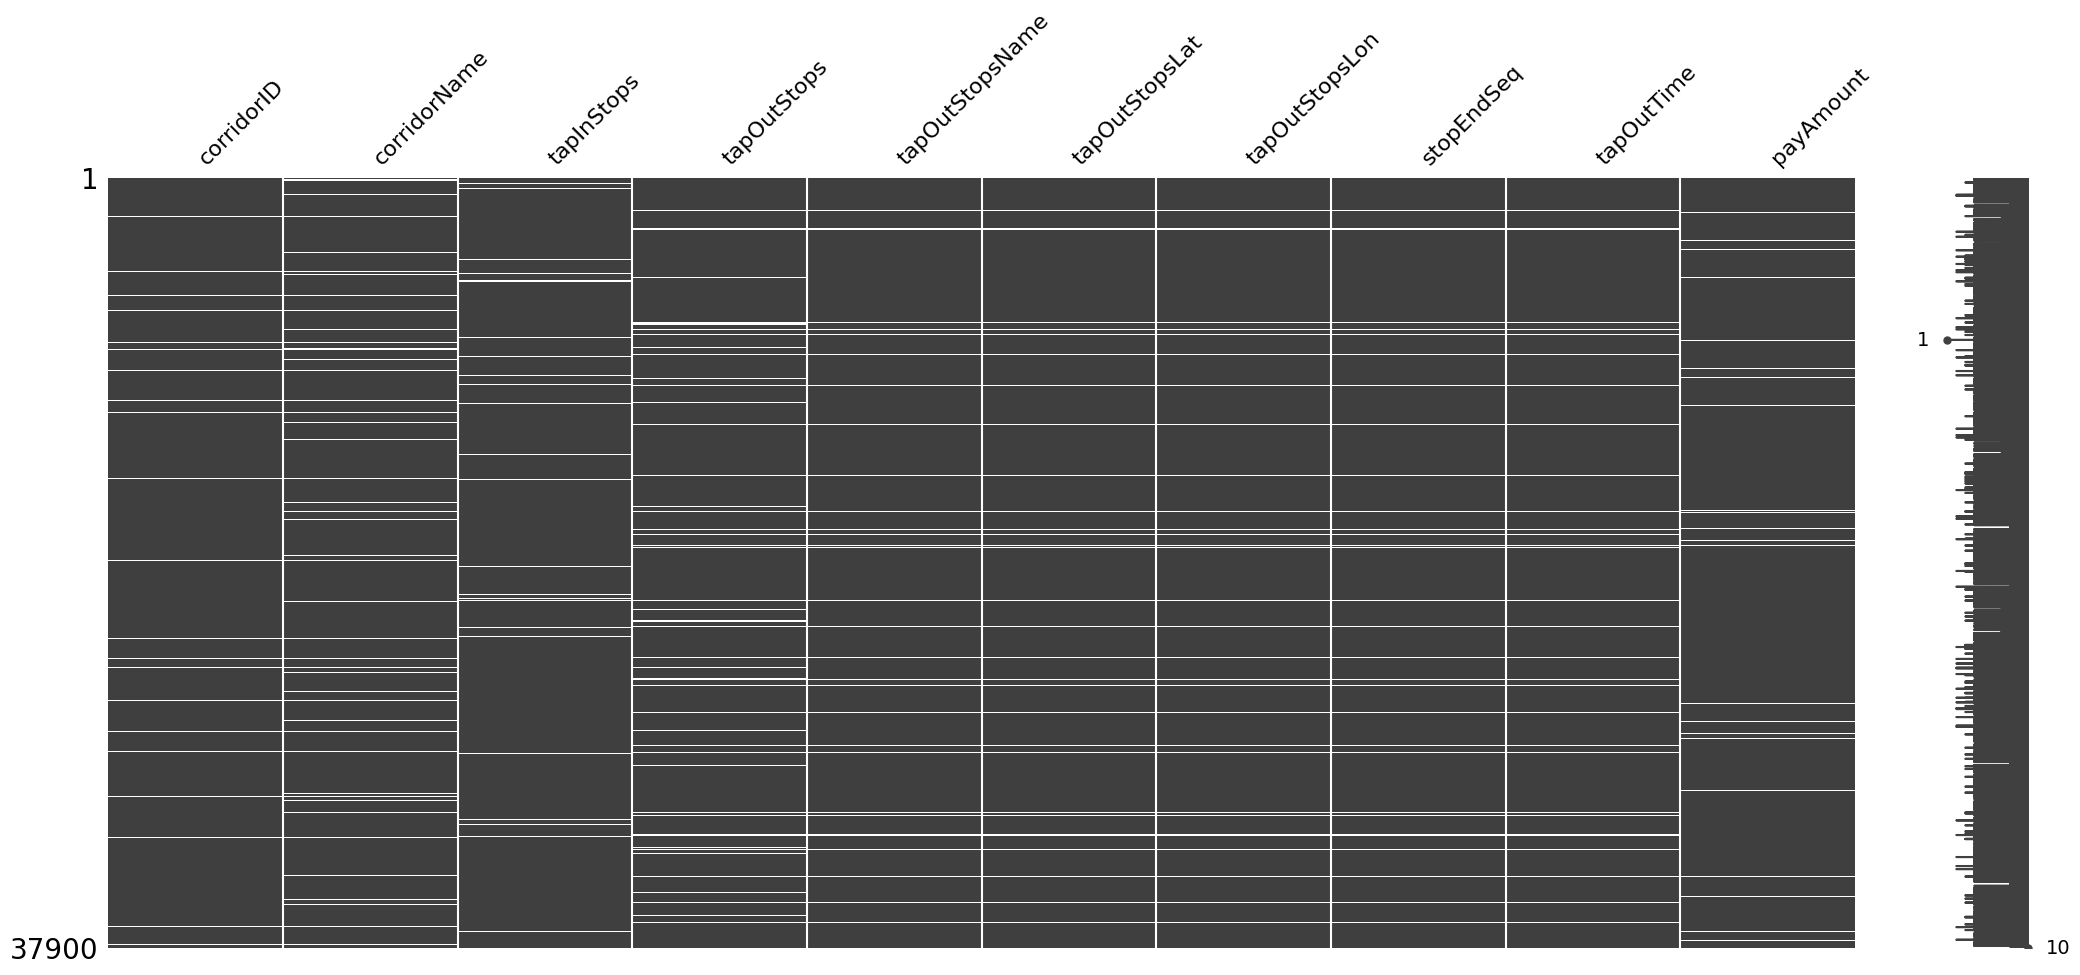

In [9]:
import missingno as msno

msno.matrix(df_tj[
                  ['corridorID', 'corridorName',
                  'tapInStops',
                  'tapOutStops', 'tapOutStopsName',
                  'tapOutStopsLat', 'tapOutStopsLon',
                  'stopEndSeq', 'tapOutTime',
                  'payAmount']
                  ]
            )

<Axes: >

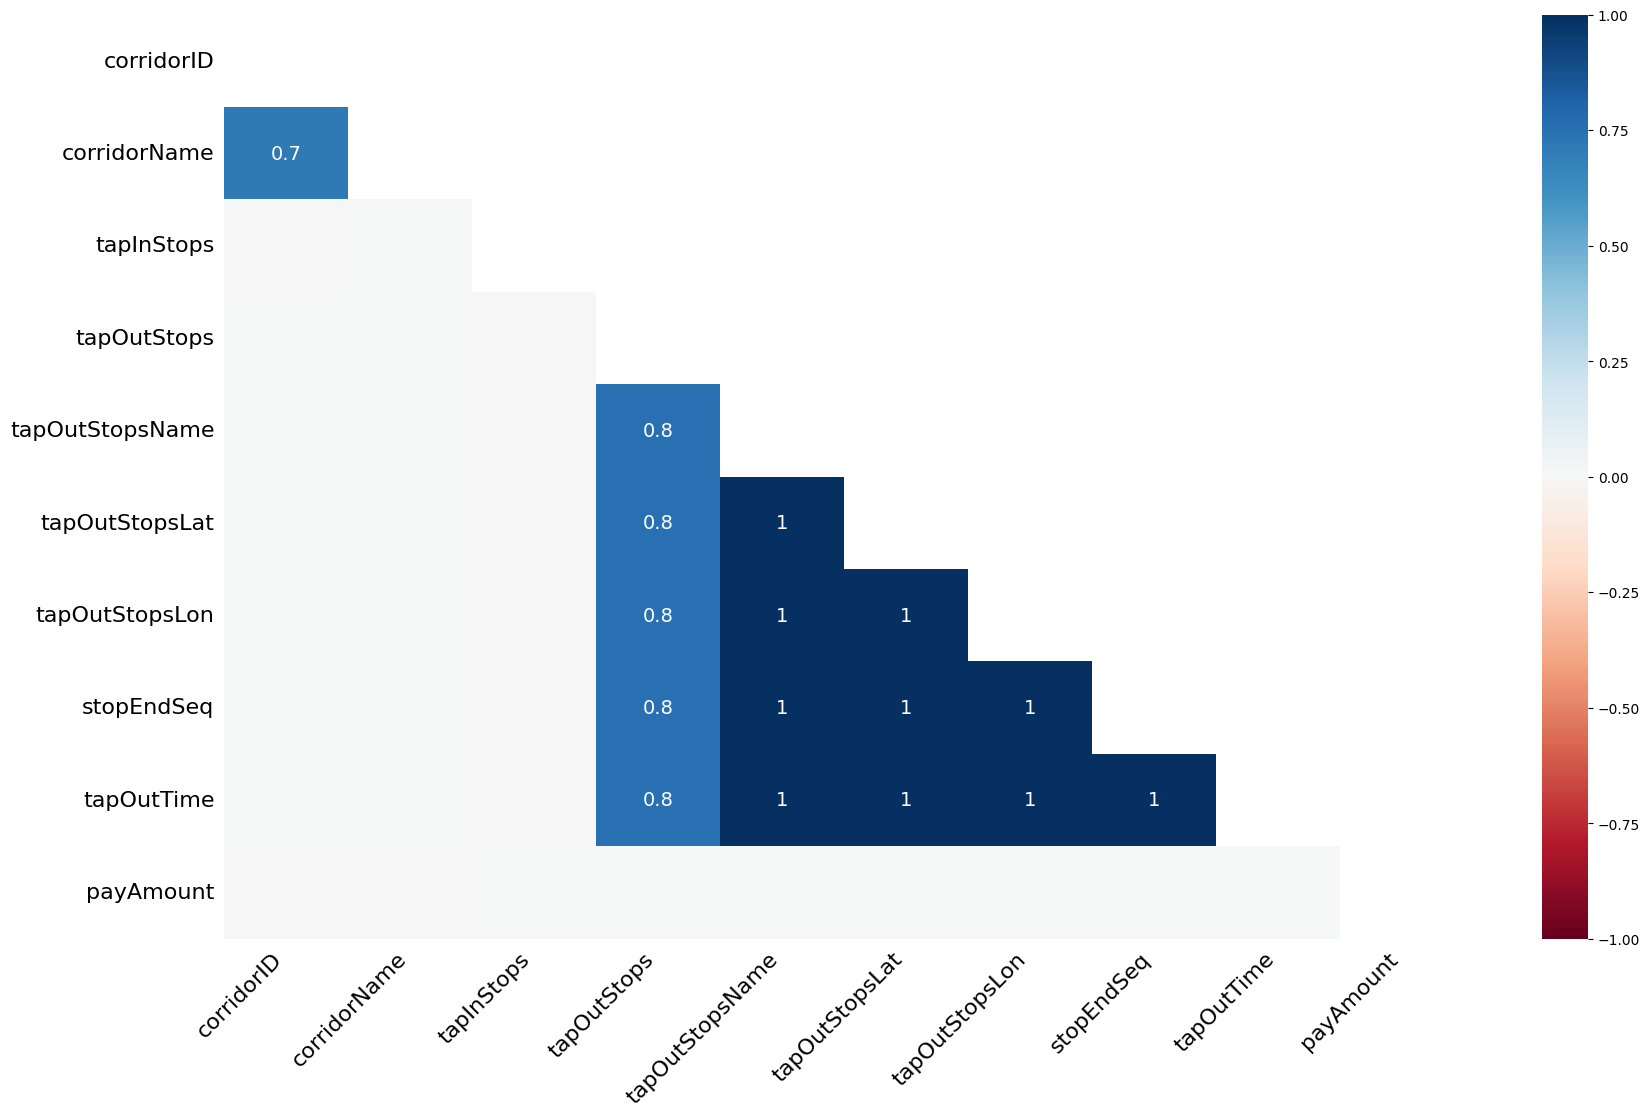

In [10]:
msno.heatmap(df_tj)

Secara garis besar:  
* Persentase *missing value* dari dataset Transjakarta hanya terdiri _kurang dari 10%_ dari setiap kolomnya. Dengan kolom `tapOutStops` yang memiliki _missing value_ terbanyak dengan persentase sebesar 6.04%
* *missing value* di kolom : `tapOutStopsName, tapOutStopsLat, tapOutStopsLon`, dan kolom `stopEndSeq` memiliki sebaran yang berkaitan. Dengan kata lain, *missing value* dari berbagai kolom ini berada di row yang sama.

Ada beberapa cara untuk menangani *missing value*:

1. Jika persentase missing < 5% : `delete row`
1. 5-20% : `simple imputation` (mean, median, modus, constant)
1. 20-50% : `advanced immputer` (KKN, iterative imputer)
1. Jika persentase missing > 50% : `delete column`

* Kolom `corridorID` dapat kita biarkan saja karena bukan termasuk bagian yang dapat kita analisis (*column to drop*)
* Untuk `tapOutStopsName, tapOutStopsLat, tapOutStopsLon`, dan kolom `stopEndSeq`, kita tidak bisa melakukan `delete row` karena *missing value* dari berbagai kolom tersebut saling berkaitan. Oleh karena itu, kita perlu melakukan `simple imputer` atau `advanced imputer` untuk mengisi *missing value*.
* *Missing value* di kolom `payAmount` juga masih dapat kita isi dengan *domain knowledge* tarif Transjakarta yaitu dengan harga *flat* 3500 untuk setiap kali *tap in*. Dimana seharusnya *median* dan *mode* dari kolom `payAmount` juga merupakan 3500.

##### **Handle Missing Value**

In [11]:
df_missing

,missingCount,missingPercentage
transID,0,0.00
payCardID,0,0.00
payCardBank,0,0.00
payCardName,0,0.00
payCardSex,0,0.00
payCardBirthDate,0,0.00
corridorID,1257,3.32
corridorName,1930,5.09
direction,0,0.00
tapInStops,1213,3.20


Kita akan mulai mencoba imputasi ke kolom kategori yang terdapat *missing values* yaitu: `corridorName` dan `tapOutStopsName`. Mari kita mulai dari kolom `tapOutStopsName` karena kolom ini akan menjadi acuan saat kita imputasi kolom `corridorName` selanjutnya. Untuk cara imputasi yang kita gunakan adalah dengan `SimpleImputer (most_frequent)`.

In [12]:
mode_imputer = SimpleImputer(strategy='most_frequent')

df_tj['tapOutStopsName'] = df_tj.groupby(['direction','tapInStopsName'])['tapOutStopsName'] \
    .transform(lambda x: x.fillna(x.mode().iloc[0]) if not x.mode().empty else x)

In [13]:
display(df_tj['tapOutStopsName'].isna().sum())
tj_raw['tapOutStopsName'].isna().sum()

np.int64(46)

np.int64(1344)

Selanjutnya kita coba isi *missing values* di kolom `corridorName` dan juga `tapOutStops` dengan menjadikan beberapa kolom lainnya sebagai acuan.

In [14]:
df_tj['corridorName'] = df_tj.groupby(['direction','tapInStopsName','tapOutStopsName'])['corridorName'] \
    .transform(lambda x: x.fillna(x.mode().iloc[0]) if not x.mode().empty else x)

In [15]:
display(tj_raw[['corridorName','tapOutStopsName']].isna().sum(), df_tj[['corridorName','tapOutStopsName']].isna().sum())

corridorName       1930
tapOutStopsName    1344
dtype: int64

corridorName       174
tapOutStopsName    46 
dtype: int64

In [16]:
# Kita coba cek hasilnya apakah masuk akal atau tidak berdasarkan domain knowledge

display(tj_raw[(tj_raw['corridorName'].isna()) & (tj_raw['tapOutStopsName'].isna())].head())
df_tj.iloc[[826,837,876,1395,2646]]

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
826,UKDF137P0B97QW,4490538004709364,dki,Ajeng Pradipta,M,1975,NaN,NaN,1.0,P00232,Stasiun Jatinegara Arah Utara,-6.215420,106.87420,7,2023-04-04 06:59:07,NaN,NaN,NaN,NaN,NaN,NaN,3500.0
837,ECUA222Z6F68WK,348971987876805,emoney,"dr. Restu Fujiati, S.Kom",M,1967,6N,NaN,0.0,P00199,Ragunan,-6.305769,106.81949,0,2023-04-04 06:46:21,NaN,NaN,NaN,NaN,NaN,NaN,3500.0
876,GEAE866S8B17LJ,213115245142137,emoney,Estiono Simbolon,F,1994,NaN,NaN,1.0,B06119P,Jln. Prima,-6.123869,106.71834,27,2023-04-04 05:59:08,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1395,UUNQ372C6Z00BO,4174057702390453,dki,Dr. Juli Megantara,M,1984,2P,NaN,1.0,B00285P,Cut Meutia,-6.187542,106.83294,25,2023-04-05 05:19:18,NaN,NaN,NaN,NaN,NaN,NaN,3500.0
2646,ESRK515O3G18KB,4120255279087511,dki,"Prima Simanjuntak, S.I.Kom",M,1987,NaN,NaN,0.0,B05768P,Tol Bekasi Timur 1,-6.263808,107.01671,11,2023-04-07 05:07:37,NaN,NaN,NaN,NaN,NaN,NaN,3500.0


,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
826,UKDF137P0B97QW,4490538004709364,dki,Ajeng Pradipta,M,1975,NaN,Tanjung Priok - PGC 2,1.0,P00232,Stasiun Jatinegara Arah Utara,-6.215420,106.87420,7,2023-04-04 06:59:07,NaN,Permai Koja Arah Utara,NaN,NaN,NaN,NaN,3500.0
837,ECUA222Z6F68WK,348971987876805,emoney,"dr. Restu Fujiati, S.Kom",M,1967,6N,Ragunan - Gelora Bung Karno,0.0,P00199,Ragunan,-6.305769,106.81949,0,2023-04-04 06:46:21,NaN,Tendean,NaN,NaN,NaN,NaN,3500.0
876,GEAE866S8B17LJ,213115245142137,emoney,Estiono Simbolon,F,1994,NaN,Rawa Buaya - Rawa Kompeni,1.0,B06119P,Jln. Prima,-6.123869,106.71834,27,2023-04-04 05:59:08,NaN,Sbr. SMAN 95,NaN,NaN,NaN,NaN,0.0
1395,UUNQ372C6Z00BO,4174057702390453,dki,Dr. Juli Megantara,M,1984,2P,Gondangdia - Senen,1.0,B00285P,Cut Meutia,-6.187542,106.83294,25,2023-04-05 05:19:18,NaN,Selatan St. Gondangdia,NaN,NaN,NaN,NaN,3500.0
2646,ESRK515O3G18KB,4120255279087511,dki,"Prima Simanjuntak, S.I.Kom",M,1987,NaN,Bekasi Timur - Cawang,0.0,B05768P,Tol Bekasi Timur 1,-6.263808,107.01671,11,2023-04-07 05:07:37,NaN,BNN LRT,NaN,NaN,NaN,NaN,3500.0


Sekarang kita coba mengisi *missing values* di kolom `payAmount` yang bertipe numerik dengan `SimpleImputer (median)`.

In [17]:
display(df_tj['payAmount'].median(), df_tj['payAmount'].mode())

np.float64(3500.0)

0    3500.0
Name: payAmount, dtype: float64

In [18]:
median_imputer = SimpleImputer(strategy='median')

# Fit
median_imputer.fit(df_tj[['payAmount']])

# Transform
df_tj['payAmount'] = median_imputer.transform(df_tj[['payAmount']])
df_tj['payAmount'] = df_tj['payAmount'].astype(int)

In [19]:
# Sekarang kita bandingkan dan cek hasilnya

display(tj_raw[tj_raw['payAmount'].isna()].head())
df_tj.iloc[[11,76,97,169,198]]

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
11,IIEK980X1O23NZ,347204308990092,emoney,R.M. Labuh Laksmiwati,F,1984,M7B,BKN - Blok M,1.0,P00254,Tendean,-6.240213,106.83102,12,2023-04-03 06:22:10,P00129,Mampang Prapatan,-6.242699,106.82572,14.0,2023-04-03 06:50:21,NaN
76,VHUC320U1S58CB,567286069354,flazz,"Dt. Atmaja Suartini, M.Farm",F,2000,JAK.48B,Stasiun Tebet - Kampung Melayu,0.0,B02272P,Masjid As Sudairi,-6.220626,106.85910,1,2023-04-03 06:12:01,B01732P,Jatinegara Timur,-6.220486,106.86825,11.0,2023-04-03 06:57:35,NaN
97,KFYK655N1H73XS,6590854673757012,dki,Bajragin Najmudin,M,1986,3H,Jelambar - Kota,0.0,P00087,Jelambar,-6.166548,106.78651,0,2023-04-03 06:03:19,P00138,Museum Fatahillah,-6.133930,106.81209,9.0,2023-04-03 06:35:04,NaN
169,IWEH403G6J82OS,30428250357040,bni,Estiawan Hastuti,M,2008,M7B,BKN - Blok M,1.0,B02114P,Lapangan Blok S,-6.237011,106.81421,6,2023-04-03 05:20:08,B00290P,Dammara,-6.254190,106.83146,18.0,2023-04-03 06:08:02,NaN
198,WFVC738E7S60SH,3540286623681182,dki,"Karimah Pangestu, S.Kom",M,1968,JAK.48A,Stasiun Tebet - Rusun Karet Tengsin,1.0,B05695P,Telkom Tebet,-6.224064,106.85160,21,2023-04-03 05:24:09,B02320P,Masjid Jami Al Mamur Bukit Duri,-6.225059,106.85606,23.0,2023-04-03 05:54:13,NaN


,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
11,IIEK980X1O23NZ,347204308990092,emoney,R.M. Labuh Laksmiwati,F,1984,M7B,BKN - Blok M,1.0,P00254,Tendean,-6.240213,106.83102,12,2023-04-03 06:22:10,P00129,Mampang Prapatan,-6.242699,106.82572,14.0,2023-04-03 06:50:21,3500
76,VHUC320U1S58CB,567286069354,flazz,"Dt. Atmaja Suartini, M.Farm",F,2000,JAK.48B,Stasiun Tebet - Kampung Melayu,0.0,B02272P,Masjid As Sudairi,-6.220626,106.85910,1,2023-04-03 06:12:01,B01732P,Jatinegara Timur,-6.220486,106.86825,11.0,2023-04-03 06:57:35,3500
97,KFYK655N1H73XS,6590854673757012,dki,Bajragin Najmudin,M,1986,3H,Jelambar - Kota,0.0,P00087,Jelambar,-6.166548,106.78651,0,2023-04-03 06:03:19,P00138,Museum Fatahillah,-6.133930,106.81209,9.0,2023-04-03 06:35:04,3500
169,IWEH403G6J82OS,30428250357040,bni,Estiawan Hastuti,M,2008,M7B,BKN - Blok M,1.0,B02114P,Lapangan Blok S,-6.237011,106.81421,6,2023-04-03 05:20:08,B00290P,Dammara,-6.254190,106.83146,18.0,2023-04-03 06:08:02,3500
198,WFVC738E7S60SH,3540286623681182,dki,"Karimah Pangestu, S.Kom",M,1968,JAK.48A,Stasiun Tebet - Rusun Karet Tengsin,1.0,B05695P,Telkom Tebet,-6.224064,106.85160,21,2023-04-03 05:24:09,B02320P,Masjid Jami Al Mamur Bukit Duri,-6.225059,106.85606,23.0,2023-04-03 05:54:13,3500


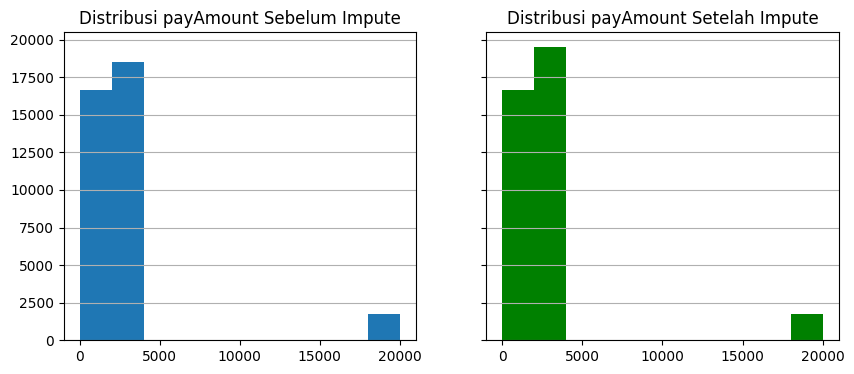

In [20]:
fig, ax = plt.subplots(1,2, figsize=(10,4), sharex=True, sharey=True)

ax[0].hist(tj_raw['payAmount'])
ax[0].set_title('Distribusi payAmount Sebelum Impute')
ax[0].grid(axis='y')

ax[1].hist(df_tj['payAmount'], color='green')
ax[1].set_title('Distribusi payAmount Setelah Impute')
ax[1].grid(axis='y')

plt.tight_layout;

Selanjutnya kita akan coba `IterativeImputer` terhadap kolom `tapOutStopsLat`, `tapOutStopsLon`, `stopEndSeq`, dan `tapOutTime` dengan mengacu kepada keempat kolom saat penumpang melakukan *tap-in.*

**TapOutStopsLat & TapOutStopsLat**

In [21]:
# Define imputer
iter_imputer = IterativeImputer()

# Fit imputer
iter_imputer.fit(df_tj[['tapOutStopsLat','tapInStopsLat']])

# Transform
df_tj['tapOutStopsLat'] = iter_imputer.transform(df_tj[['tapOutStopsLat','tapInStopsLat']])
df_tj['tapOutStopsLat'] = df_tj['tapOutStopsLat'].astype('float64')

In [22]:
iter_imputer.fit(df_tj[['tapOutStopsLon','tapInStopsLon']])

df_tj['tapOutStopsLon'] = iter_imputer.transform(df_tj[['tapOutStopsLon','tapInStopsLon']])
df_tj['tapOutStopsLon'] = df_tj['tapOutStopsLon'].astype('float64')

**StopEndSeq**

In [23]:
iter_imputer.fit(df_tj[['stopEndSeq','stopStartSeq']])

df_tj['stopEndSeq'] = iter_imputer.transform(df_tj[['stopEndSeq','stopStartSeq']])
df_tj['stopEndSeq'] = df_tj['stopEndSeq'].astype('int64')

In [24]:
df_tj.isna().sum()

transID              0  
payCardID            0  
payCardBank          0  
payCardName          0  
payCardSex           0  
payCardBirthDate     0  
corridorID          1257
corridorName        174 
direction            0  
tapInStops          1213
tapInStopsName       0  
tapInStopsLat        0  
tapInStopsLon        0  
stopStartSeq         0  
tapInTime            0  
tapOutStops         2289
tapOutStopsName     46  
tapOutStopsLat       0  
tapOutStopsLon       0  
stopEndSeq           0  
tapOutTime          1344
payAmount            0  
dtype: int64

**Cek Hasil Setelah Impute**

In [25]:
# CEK HASIL

display(tj_raw[(tj_raw['tapOutStopsLat'].isna()) \
     & (tj_raw['tapOutStopsLon'].isna()) \
     & (tj_raw['stopEndSeq'].isna()) \
     & (tj_raw['payAmount'].isna())].head(),
        df_tj.iloc[[1369,1876,2797,3819,3976]])

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
1369,UUPQ921L7D81PE,30428250357040,bni,Estiawan Hastuti,M,2008,M7B,BKN - Blok M,1.0,B02114P,Lapangan Blok S,-6.237011,106.814210,6,2023-04-05 06:04:28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1876,FAPF791V1H74DK,567286069354,flazz,"Dt. Atmaja Suartini, M.Farm",F,2000,JAK.48B,Stasiun Tebet - Kampung Melayu,0.0,B02272P,Masjid As Sudairi,-6.220626,106.859100,1,2023-04-06 06:34:11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2797,GJUS986M6D42UM,6590854673757012,dki,Bajragin Najmudin,M,1986,3H,Jelambar - Kota,1.0,P00294,Sawah Besar Arah Selatan,-6.157368,106.818661,4,2023-04-07 16:13:21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3819,ROKV443V3N55LC,180074627743328,emoney,"Dt. Karsa Nasyidah, M.Kom.",F,1990,JAK.48A,Stasiun Tebet - Rusun Karet Tengsin,1.0,B00115P,UPT. LLHD 2,-6.225501,106.834890,17,2023-04-11 05:40:42,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3976,RYEJ973C8B96FL,567286069354,flazz,"Dt. Atmaja Suartini, M.Farm",F,2000,JAK.48B,Stasiun Tebet - Kampung Melayu,1.0,B00138P,Bidara Cina 1,-6.229954,106.867350,1,2023-04-11 16:59:58,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
1369,UUPQ921L7D81PE,30428250357040,bni,Estiawan Hastuti,M,2008,M7B,BKN - Blok M,1.0,B02114P,Lapangan Blok S,-6.237011,106.814210,6,2023-04-05 06:04:28,NaN,Dammara,-6.234974,106.816592,14,NaN,3500
1876,FAPF791V1H74DK,567286069354,flazz,"Dt. Atmaja Suartini, M.Farm",F,2000,JAK.48B,Stasiun Tebet - Kampung Melayu,0.0,B02272P,Masjid As Sudairi,-6.220626,106.859100,1,2023-04-06 06:34:11,NaN,Masjid Attahiriyah,-6.219948,106.857077,9,NaN,3500
2797,GJUS986M6D42UM,6590854673757012,dki,Bajragin Najmudin,M,1986,3H,Jelambar - Kota,1.0,P00294,Sawah Besar Arah Selatan,-6.157368,106.818661,4,2023-04-07 16:13:21,NaN,Harmoni Arah Selatan,-6.161934,106.820606,12,NaN,3500
3819,ROKV443V3N55LC,180074627743328,emoney,"Dt. Karsa Nasyidah, M.Kom.",F,1990,JAK.48A,Stasiun Tebet - Rusun Karet Tengsin,1.0,B00115P,UPT. LLHD 2,-6.225501,106.834890,17,2023-04-11 05:40:42,NaN,Sawo Kecik Raya,-6.224419,106.835242,24,NaN,3500
3976,RYEJ973C8B96FL,567286069354,flazz,"Dt. Atmaja Suartini, M.Farm",F,2000,JAK.48B,Stasiun Tebet - Kampung Melayu,1.0,B00138P,Bidara Cina 1,-6.229954,106.867350,1,2023-04-11 16:59:58,NaN,St. Tebet 3,-6.228502,106.864517,9,NaN,3500


In [26]:
df_tj_missing = pd.DataFrame(df_tj.isna().sum()).rename(columns={0:'missingCount'})
df_tj_missing['missingPercentage'] = round((df_tj_missing['missingCount'] / len(df_tj)), 4) * 100
df_tj_missing

,missingCount,missingPercentage
transID,0,0.00
payCardID,0,0.00
payCardBank,0,0.00
payCardName,0,0.00
payCardSex,0,0.00
payCardBirthDate,0,0.00
corridorID,1257,3.32
corridorName,174,0.46
direction,0,0.00
tapInStops,1213,3.20


Setelah kita selsai mencoba `SimpleImputer` dan `IterativeImputer`, kini *missing values* dataset kita tidak ada yang proporsinya diatas 5%, oleh karena itu, kita bisa gunakan `dropna()` sebagai opsi terakhir.

In [28]:
df = df_tj.drop(columns=['corridorID','tapInStops','tapOutStops'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorName      37726 non-null  object 
 7   direction         37900 non-null  float64
 8   tapInStopsName    37900 non-null  object 
 9   tapInStopsLat     37900 non-null  float64
 10  tapInStopsLon     37900 non-null  float64
 11  stopStartSeq      37900 non-null  int64  
 12  tapInTime         37900 non-null  object 
 13  tapOutStopsName   37854 non-null  object 
 14  tapOutStopsLat    37900 non-null  float64
 15  tapOutStopsLon    37900 non-null  float64
 16  stopEndSeq        37900 non-null  int64 

Kemudian kita akan isi *missing values* di kolom `tapOutTime` berdasarkan nilai rata-rata durasi perjalanan penumpang dari `tapInTime` + nilai rata-ratanya.

In [31]:
# Casting tipe data
df['tapInTime'] = pd.to_datetime(df['tapInTime'], format='%Y-%m-%d %H:%M:%S')
df['tapOutTime'] = pd.to_datetime(df['tapOutTime'], format='%Y-%m-%d %H:%M:%S')

df[['tapInTime','tapOutTime']].dtypes

tapInTime     datetime64[ns]
tapOutTime    datetime64[ns]
dtype: object

In [32]:
# Rata-rata durasi perjalanan penumpang
(df['tapOutTime'] - df['tapInTime']).dt.total_seconds().mean() / 60

np.float64(72.12542400700295)

In [33]:
df['tapOutTime'] = df['tapOutTime'].fillna(df['tapInTime'].apply(lambda x: x + pd.Timedelta(minutes=72)))

Mari kita cek hasilnya

In [34]:
display(df_tj[df_tj['tapOutTime'].isna()].head(), \
        df.iloc[[6,30,70,130,192]])

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
6,HEMW326B9N91TV,213155822653833,emoney,"R. Devi Hariyah, S.T.",M,1974,JAK.18,Kalibata - Kuningan,0.0,B00243P,Cervino Village,-6.224355,106.85165,25,2023-04-03 06:58:21,NaN,Simpang Al Barkah Dr Saharjo,-6.223368,106.850358,31,NaT,0
30,TCKQ601Q5O01BC,3589380857722689,dki,drg. Lukman Hidayanto,M,1995,JAK.46,Pasar Minggu - Jagakarsa,1.0,B00001P,18 Office Park,-6.299146,106.83210,19,2023-04-03 06:14:02,NaN,Gg. Puskesmas Kebagusan Raya,-6.291958,106.832726,26,NaT,0
70,OTGH855B8A29BP,3549158005951908,dki,"Mustofa Wijayanti, M.Farm",M,1981,1T,Cibubur - Balai Kota,0.0,B02408P,Menara Astra,-6.207361,106.82190,7,2023-04-03 05:57:55,NaN,Menara Thamrin,-6.207782,106.823527,15,NaT,20000
130,JUKK703H7F00XH,570918242399,flazz,Mumpuni Gunarto,F,1998,10D,Kampung Rambutan - Tanjung Priok,0.0,P00035,Cempaka Mas,-6.165888,106.87920,7,2023-04-03 05:40:04,NaN,Permai Koja Arah Utara,-6.169748,106.875205,15,NaT,3500
192,KKPV811K6H59ZY,3548650711273610,dki,Balangga Permadi,F,2011,3F,Kalideres - Gelora Bung Karno,0.0,P00050,Dispenda Samsat Barat,-6.154634,106.73810,11,2023-04-03 06:15:53,NaN,Jembatan Baru,-6.159427,106.747950,18,NaT,3500


,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorName,direction,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
6,HEMW326B9N91TV,213155822653833,emoney,"R. Devi Hariyah, S.T.",M,1974,Kalibata - Kuningan,0.0,Cervino Village,-6.224355,106.85165,25,2023-04-03 06:58:21,Simpang Al Barkah Dr Saharjo,-6.223368,106.850358,31,2023-04-03 08:10:21,0
30,TCKQ601Q5O01BC,3589380857722689,dki,drg. Lukman Hidayanto,M,1995,Pasar Minggu - Jagakarsa,1.0,18 Office Park,-6.299146,106.83210,19,2023-04-03 06:14:02,Gg. Puskesmas Kebagusan Raya,-6.291958,106.832726,26,2023-04-03 07:26:02,0
70,OTGH855B8A29BP,3549158005951908,dki,"Mustofa Wijayanti, M.Farm",M,1981,Cibubur - Balai Kota,0.0,Menara Astra,-6.207361,106.82190,7,2023-04-03 05:57:55,Menara Thamrin,-6.207782,106.823527,15,2023-04-03 07:09:55,20000
130,JUKK703H7F00XH,570918242399,flazz,Mumpuni Gunarto,F,1998,Kampung Rambutan - Tanjung Priok,0.0,Cempaka Mas,-6.165888,106.87920,7,2023-04-03 05:40:04,Permai Koja Arah Utara,-6.169748,106.875205,15,2023-04-03 06:52:04,3500
192,KKPV811K6H59ZY,3548650711273610,dki,Balangga Permadi,F,2011,Kalideres - Gelora Bung Karno,0.0,Dispenda Samsat Barat,-6.154634,106.73810,11,2023-04-03 06:15:53,Jembatan Baru,-6.159427,106.747950,18,2023-04-03 07:27:53,3500


### **DF Cleaned**

Sekarang kita drop NaN yang tersisa, dan mari kita bandingkan hasil total entries dataset kita sesudah dan sebelum kita melakukan cleansing.

In [57]:
df = df.dropna()

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37726 entries, 0 to 37899
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transID           37726 non-null  object        
 1   payCardID         37726 non-null  int64         
 2   payCardBank       37726 non-null  object        
 3   payCardName       37726 non-null  object        
 4   payCardSex        37726 non-null  object        
 5   payCardBirthDate  37726 non-null  int64         
 6   corridorName      37726 non-null  object        
 7   direction         37726 non-null  float64       
 8   tapInStopsName    37726 non-null  object        
 9   tapInStopsLat     37726 non-null  float64       
 10  tapInStopsLon     37726 non-null  float64       
 11  stopStartSeq      37726 non-null  int64         
 12  tapInTime         37726 non-null  datetime64[ns]
 13  tapOutStopsName   37726 non-null  object        
 14  tapOutStopsLat    37726 non

<Axes: >

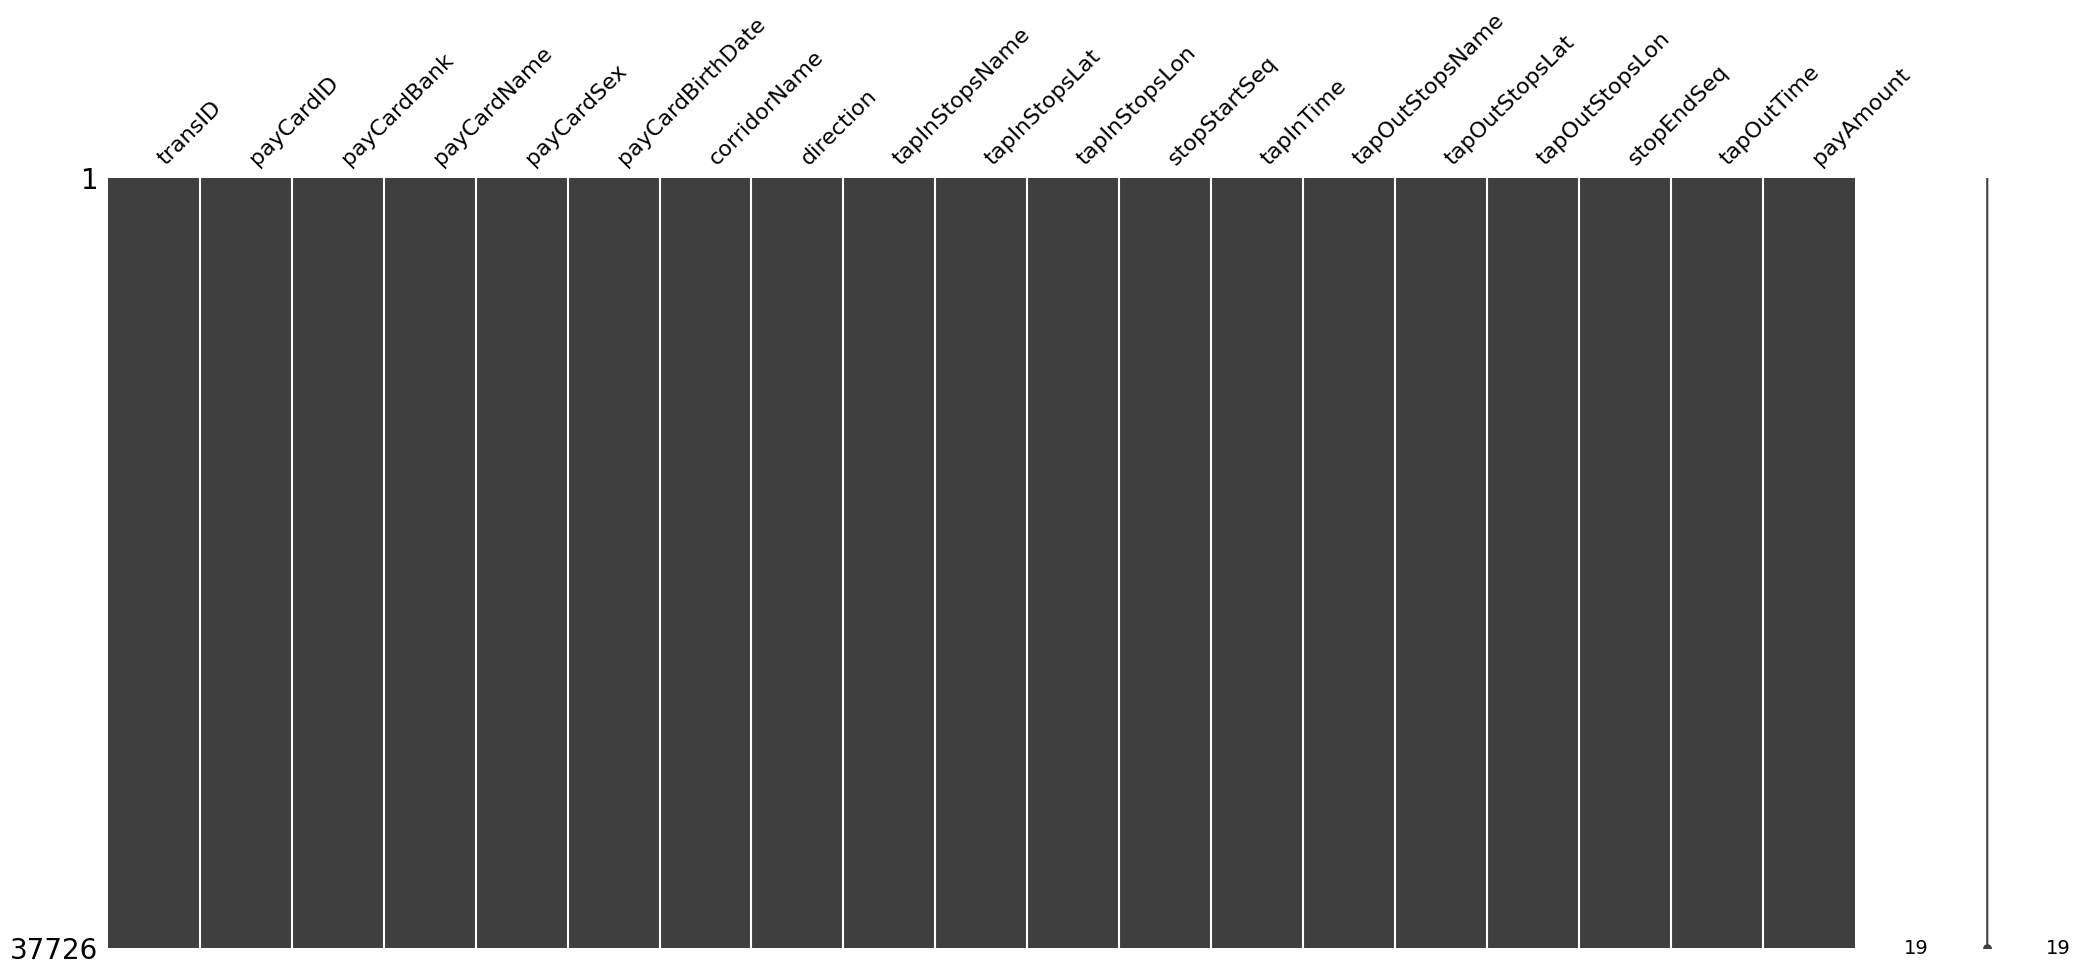

In [63]:
msno.matrix(df)

In [52]:
pd.set_option('display.max_colwidth', 60)
unique_items = []

for col in df.columns :
    unique_items.append( [col, df[col].nunique(), df[col].unique()])

raw_desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=unique_items)
raw_desc

,Column Name,Number of Unique,Unique Sample
0,transID,37726,"[EIIW227B8L34VB, LGXO740D2N47GZ, DJWR385V2U57TO, JTUZ800..."
1,payCardID,1982,"[180062659848800, 4885331907664776, 4996225095064169, 63..."
2,payCardBank,6,"[emoney, dki, flazz, online, brizzi, bni]"
3,payCardName,1975,"[Bajragin Usada, Gandi Widodo, Emong Wastuti, Surya Waca..."
4,payCardSex,2,"[M, F]"
5,payCardBirthDate,67,"[2008, 1997, 1992, 1978, 1982, 1993, 1974, 1991, 2004, 1..."
6,corridorName,216,"[Matraman Baru - Ancol, Stasiun Tebet - Karet via Patra ..."
7,direction,2,"[1.0, 0.0]"
8,tapInStopsName,2515,"[Pal Putih, Kemenkes 2, Gg. Kunir II, Taman Elok 1, Sunt..."
9,tapInStopsLat,2500,"[-6.184631, -6.2287, -6.133132, -6.195743, -6.14965, -6...."


In [54]:
df.isna().sum().sum()

np.int64(0)

In [55]:
df.sample(10)

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorName,direction,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
16909,XYWD652K6R09AR,4446021936531169,dki,"Wisnu Pratiwi, M.Ak",M,1991,Rawamangun - Klender,1.0,Jln. Tegal Amba Rt03,-6.223017,106.906480,20,2023-04-07 20:48:20,Naga Raya Duren Sawit,-6.224769,106.91146,24,2023-04-07 22:07:16,0
23325,YBIQ902N2T78QJ,4578758363171981,dki,"Shania Waluyo, S.Farm",F,1989,Joglo - Blok M,0.0,Jln. Palatehan,-6.240057,106.800758,1,2023-04-18 07:02:17,Permata Hijau RS Medika 1,-6.218855,106.77808,16,2023-04-18 07:46:34,3500
19295,CCJJ269U2A69ZC,5470428062544344,dki,Kamila Sudiati,M,1988,Pulo Gebang - Pulo Gadung 2 via PIK,1.0,Jln. Kesadaran Pool Bus 1,-6.182475,106.913090,2,2023-04-12 06:09:29,Jagal 2,-6.190792,106.93472,9,2023-04-12 06:47:09,3500
13929,TGNL978Q3G82PS,4965754419769895,dki,Nasrullah Megantara,M,1982,Blok M - Kota,0.0,Blok M,-6.243312,106.801750,0,2023-04-04 17:45:02,Kali Besar Barat,-6.135355,106.81143,19,2023-04-04 19:20:44,3500
30219,NNET180U0T54GN,213182881743974,emoney,Putri Nashiruddin,M,1995,Cibubur - Balai Kota,1.0,Wisma Nusantara,-6.193425,106.823190,5,2023-04-27 09:06:10,Bumiputera,-6.206839,106.82234,8,2023-04-27 09:49:12,20000
13756,TMZU037W7G32WN,180057326497940,emoney,Marwata Najmudin,F,2009,Pinang Ranti - Pulo Gadung,1.0,Giant Pondok Gede 1,-6.278286,106.913270,36,2023-04-04 19:27:04,Ps. Pondok Gede,-6.285665,106.91158,38,2023-04-04 20:46:40,3500
20322,UTXZ498E0X32XZ,639000296355,flazz,Catur Najmudin,F,2012,BSD Serpong - Fatmawati,0.0,Versailles,-6.308405,106.673670,2,2023-04-13 07:59:37,St. MRT Fatmawati,-6.292589,106.79360,3,2023-04-13 09:47:38,20000
14709,ZYMF448S5P70AI,2225718394811808,dki,Pangeran Sudiati,F,1990,Harapan Baru - Pulo Gebang via Rawa Kuning,0.0,Sbr. SDN Pulo Gebang 20,-6.208103,106.959230,11,2023-04-05 18:08:36,Gg. Damai,-6.196948,106.95590,17,2023-04-05 19:36:34,0
23630,QSJS375Q4R07CO,180006537547852,emoney,"Lanang Pertiwi, M.M.",F,1983,Kalimalang - Duren Sawit,1.0,Carrefour Buaran,-6.218653,106.923700,17,2023-04-18 20:33:59,Jln. Serdang,-6.228906,106.91459,26,2023-04-18 21:44:51,0
32120,JXTH664E4T34YB,213105335345336,emoney,Gangsa Dabukke,M,1991,Grogol - Meruya via Roxy,1.0,SDN Meruya Utara 02 Pagi,-6.199267,106.741660,18,2023-04-09 21:05:32,Kel. Duri Kepa,-6.185225,106.77307,43,2023-04-09 21:24:42,0


In [61]:
print(f'Jumlah total entries sebelum proses cleansing = {len(tj_raw)}\n')
print(f'Jumlah total entries setelah proses cleansing = {len(df)}\n')
print(f'Persentase entries setelah proses cleansing = {round(len(df) / len(tj_raw) * 100, 2)}%')

Jumlah total entries sebelum proses cleansing = 37900

Jumlah total entries setelah proses cleansing = 37726

Persentase entries setelah proses cleansing = 99.54%


In [66]:
# df.to_csv('tj_cleaned.csv', index=False)

## **To-Do Next:**
    
**[  ]** Kolom `pendidikan` (.strip('.'))

**[  ]** Kolom `umur` (2025 - `payCardBirthDate`)

**[  ]** Kolom `durasiPerjalanan`

In [67]:
df.columns

Index(['transID', 'payCardID', 'payCardBank', 'payCardName', 'payCardSex',
       'payCardBirthDate', 'corridorName', 'direction', 'tapInStopsName',
       'tapInStopsLat', 'tapInStopsLon', 'stopStartSeq', 'tapInTime',
       'tapOutStopsName', 'tapOutStopsLat', 'tapOutStopsLon', 'stopEndSeq',
       'tapOutTime', 'payAmount'],
      dtype='object')

In [ ]:
df[df['payCardName'].str.contains(', ')]

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorName,direction,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
6,HEMW326B9N91TV,213155822653833,emoney,"R. Devi Hariyah, S.T.",M,1974,Kalibata - Kuningan,0.0,Cervino Village,-6.224355,106.85165,25,2023-04-03 06:58:21,Simpang Al Barkah Dr Saharjo,-6.223368,106.850358,31,2023-04-03 08:10:21,0
8,OIHS248V7S72EB,6510013988638519,dki,"Cagak Maheswara, S.Sos",F,1992,Bekasi Barat - Kuningan,1.0,Imperium,-6.210363,106.83059,1,2023-04-03 06:01:44,Kayuringin 2,-6.245948,106.992470,16,2023-04-03 06:51:12,20000
10,CLWK627W2M22WO,5541851157087967,dki,"Oskar Widiastuti, S.Farm",F,1997,Kampung Melayu - Tanah Abang via Cikini,1.0,Pegangsaan Timur,-6.199263,106.84205,17,2023-04-03 06:32:28,Matraman 4,-6.199782,106.854500,23,2023-04-03 07:23:54,3500
17,CUPO258C0D42PY,4969284110642,online,"Hj. Ophelia Haryanti, S.Sos",M,2002,Kebayoran Lama - Jelambar,1.0,Apartemen Simprug Teras,-6.232197,106.78874,19,2023-04-03 05:41:28,Pasar Kebayoran Lama,-6.238413,106.783230,20,2023-04-03 06:35:41,3500
18,SBPQ144H4S45RA,502034641014,flazz,"Adikara Kurniawan, S.Sos",M,2003,Pinang Ranti - Pluit,1.0,Jembatan Tiga Arah Utara,-6.133383,106.79267,2,2023-04-03 06:24:23,Pancoran Tugu Arah Barat,-6.243300,106.843880,16,2023-04-03 07:07:12,3500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37873,PLVB994X9Y80YJ,4268357779873820,dki,"Daniswara Gunawan, S.Pd",M,1978,Rusun Pondok Bambu - Walikota Jakarta Timur,0.0,Rusun Pondok Bambu,-6.241583,106.91085,0,2023-04-29 05:46:00,Wisma Atlet Radin Inten,-6.223513,106.923220,10,2023-04-29 07:13:41,0
37883,XONH970J2Q38XO,581570008267,flazz,"Genta Utama, S.E.I",M,1986,Kalideres - Bundaran HI via Veteran,1.0,Petojo,-6.169984,106.81698,12,2023-04-19 15:14:24,Bundaran HI,-6.193021,106.823000,16,2023-04-19 17:58:41,3500
37886,IFPF807G7R92DX,213160779285738,emoney,"R. Putri Kusumo, S.E.I",F,1997,Pantai Maju - Balai Kota,0.0,Pantai Maju,-6.093637,106.75068,0,2023-04-09 15:45:24,Sawah Besar Arah Selatan,-6.157368,106.818661,27,2023-04-09 17:44:38,3500
37891,XQDZ821C9G88JD,2712823212983860,dki,"drg. Maras Wibowo, S.Ked",F,1966,Grogol - Meruya via Roxy,1.0,Jln. Kartika Meruya Selatan,-6.203099,106.73673,14,2023-04-19 16:31:09,Sbr. Masjid Nurul Falah Grogol,-6.170757,106.784770,53,2023-04-19 19:13:53,0
